# Gradient Boosting - Lab

## Introduction

In this lab, we'll learn how to use both Adaboost and Gradient Boosting classifiers from scikit-learn!

## Objectives

You will be able to:

- Use AdaBoost to make predictions on a dataset 
- Use Gradient Boosting to make predictions on a dataset 

## Getting Started

In this lab, we'll learn how to use boosting algorithms to make classifications on the [Pima Indians Dataset](http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names). You will find the data stored in the file `'pima-indians-diabetes.csv'`. Our goal is to use boosting algorithms to determine whether a person has diabetes. Let's get started!

We'll begin by importing everything we need for this lab. Run cell below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Now, use Pandas to import the data stored in `'pima-indians-diabetes.csv'` and store it in a DataFrame. Print the first five rows to inspect the data we've imported and ensure everything loaded correctly. 

In [2]:
# Import the data
df = pd.read_csv('pima-indians-diabetes.csv')

# Print the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning, exploration, and preprocessing

The target we're trying to predict is the `'Outcome'` column. A `1` denotes a patient with diabetes. 

By now, you're quite familiar with exploring and preprocessing a dataset.  

In the following cells:

* Check for missing values and deal with them as you see fit (if any exist) 
* Count the number of patients with and without diabetes in this dataset 
* Store the target column in a separate variable and remove it from the dataset
* Split the dataset into training and test sets, with a `test_size` of 0.25 and a `random_state` of 42

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb18bf67080>,
      dtype=object)

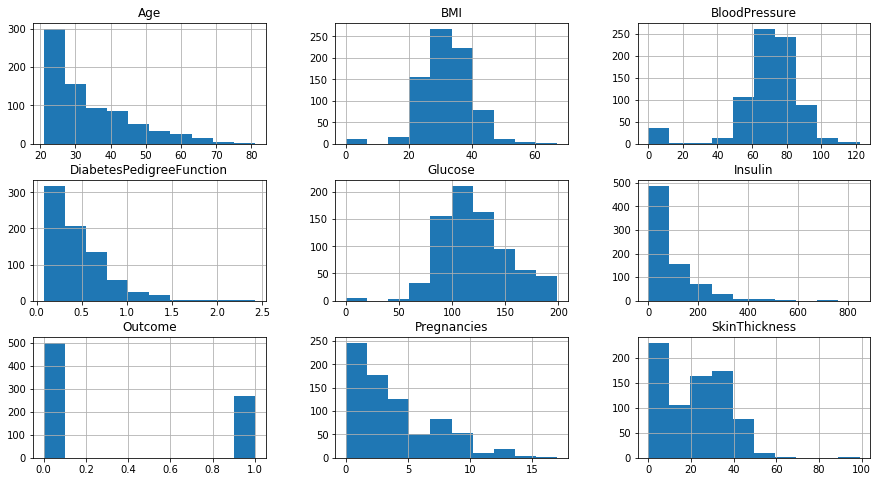

In [4]:
# Check for missing values
df.hist(figsize=(15,8))

In [8]:
df.loc[df["BloodPressure"]<40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
125,1,88,30,42,99,55.0,0.496,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1


In [ ]:
# I'm tempted to remove observations with 0 for BMI, BloodPressure, Glucose.
# The solution has not removed them, though, so for now I'm leaving them in
# so I can check the accuracy of my work.

In [10]:
# Number of patients with and without diabetes
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
target = df['Outcome']
df = df.drop('Outcome', axis=1)

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=.25, random_state=42)

## Train the models

Now that we've explored the dataset, we're ready to fit some models!

In the cell below:

* Instantiate an `AdaBoostClassifier` (set the `random_state` for 42)
* Instantiate a `GradientBoostingClassifer` (set the `random_state` for 42) 

In [14]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

Now, fit the training data to both the classifiers: 

In [15]:
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [16]:
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Now, let's use these models to predict labels on both the training and test sets: 

In [17]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

Now, complete the following function and use it to calculate the accuracy and f1-score for each model: 

In [19]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8350694444444444
F1-Score: 0.7493403693931399

Model: Gradient Boosted Trees
Accuracy: 0.9409722222222222
F1-Score: 0.9105263157894736

Testing Metrics
Model: AdaBoost
Accuracy: 0.7239583333333334
F1-Score: 0.618705035971223

Model: Gradient Boosted Trees
Accuracy: 0.75
F1-Score: 0.6666666666666666


Let's go one step further and create a confusion matrix and classification report for each. Do so in the cell below: 

In [20]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[96, 27],
       [26, 43]])

In [21]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[96, 27],
       [21, 48]])

In [23]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       123
           1       0.61      0.62      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



In [24]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       123
           1       0.64      0.70      0.67        69

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.75      0.75       192



**_Question:_** How did the models perform? Interpret the evaluation metrics above to answer this question.

Write your answer below this line:
_______________________________________________________________________________________________________________________________

 
 
As a final performance check, let's calculate the 5-fold cross-validated score for each model! 

Recall that to compute the cross-validation score, we need to pass in:

* A classifier
* All training data
* All labels
* The number of folds we want in our cross-validation score  

Since we're computing cross-validation score, we'll want to pass in the entire dataset, as well as all of the labels. 

In the cells below, compute the mean cross validation score for each model. 

In [25]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, target, cv=5).mean())
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
0.7631270690094218


In [26]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, df, target, cv=5).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.7591715474068416


These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the **_Learning Rate_**. 

## Summary

In this lab, we learned how to use scikit-learn's implementations of popular boosting algorithms such as AdaBoost and Gradient Boosted Trees to make classification predictions on a real-world dataset!